In [120]:
import pickle
import sys
sys.path.append('..')
from src.sympy_utilities import *
from src.BinaryEncodings import *
from src.qiskit_utilities import *
from src.MatrixToPauliString import *

import matplotlib.pyplot as plt

In [121]:
h_b_HO = 0.5*(p*p + m*m*q*q)
h_f_HO = -0.5*m#[bdag,b]

hamHO = Hamiltonian(h_b_HO, h_f_HO, {m:1, g:1},
                  2**1, standard_encode)

In [122]:
hamHO.pauliStrings

1.0*I^0*I^1 + 0.5*I^0*Z^1 - 0.5*I^1*Z^0

In [123]:
from qiskit.aqua.operators import I,X,Y,Z, PauliTrotterEvolution
from qiskit import QuantumCircuit, transpile

In [124]:
operator1 = ((1.5*I^I).exp_i())
operator2 = ((-0.5*I^Z).exp_i())
operator3 = ((0.5*Z^I).exp_i())

II


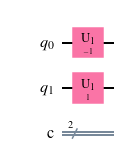

In [125]:

trotter_op1 = PauliTrotterEvolution(trotter_mode='suzuki').convert(operator1)
trotter_op2 = PauliTrotterEvolution(trotter_mode='suzuki').convert(operator2)
trotter_op3 = PauliTrotterEvolution(trotter_mode='suzuki').convert(operator3)
print(operator1)
qc = QuantumCircuit(2,2)
qc.append(trotter_op1, [0,1])
qc.append(trotter_op2, [0,1])
qc.append(trotter_op3, [0,1])
transpile(qc, basis_gates = ['cx', 'u1', 'u2', 'u3', 'H', 'X', 'Y', 'Z','id']).draw('mpl')

In [126]:
1/16

0.0625

In [127]:
h_b_AHO = 0.5*(p*p) + 0.5*(m*q+g*q**3)**2
h_f_AHO = -0.5*(m+3*g*q*q)#[bdag,b]

hamAHO = Hamiltonian(h_b_AHO, h_f_AHO, {m:1, g:1},
                  2**2, standard_encode)
print(hamAHO.harmonic)
print()
print(hamAHO.fermionic)
print()
print(hamAHO.pauliStrings)
#print()
#print(np.linalg.eig(hamAHO.hamMatrix))

0.5*a*ad + 0.25*a*ad*a*ad + 0.0625*a*ad*a*ad*a*ad + 0.0625*a*ad*a*ad*a**2 + 0.0625*a*ad*a*ad**2*a + 0.0625*a*ad*a*ad**3 + 0.25*a*ad*a**2 + 0.0625*a*ad*a**2*ad*a + 0.0625*a*ad*a**2*ad**2 + 0.0625*a*ad*a**3*ad + 0.0625*a*ad*a**4 + 0.25*a*ad**2*a + 0.0625*a*ad**2*a*ad*a + 0.0625*a*ad**2*a*ad**2 + 0.0625*a*ad**2*a**2*ad + 0.0625*a*ad**2*a**3 + 0.25*a*ad**3 + 0.0625*a*ad**3*a*ad + 0.0625*a*ad**3*a**2 + 0.0625*a*ad**4*a + 0.0625*a*ad**5 + 0.25*a**2*ad*a + 0.0625*a**2*ad*a*ad*a + 0.0625*a**2*ad*a*ad**2 + 0.0625*a**2*ad*a**2*ad + 0.0625*a**2*ad*a**3 + 0.25*a**2*ad**2 + 0.0625*a**2*ad**2*a*ad + 0.0625*a**2*ad**2*a**2 + 0.0625*a**2*ad**3*a + 0.0625*a**2*ad**4 + 0.25*a**3*ad + 0.0625*a**3*ad*a*ad + 0.0625*a**3*ad*a**2 + 0.0625*a**3*ad**2*a + 0.0625*a**3*ad**3 + 0.25*a**4 + 0.0625*a**4*ad*a + 0.0625*a**4*ad**2 + 0.0625*a**5*ad + 0.0625*a**6 + 0.5*ad*a + 0.25*ad*a*ad*a + 0.0625*ad*a*ad*a*ad*a + 0.0625*ad*a*ad*a*ad**2 + 0.0625*ad*a*ad*a**2*ad + 0.0625*ad*a*ad*a**3 + 0.25*ad*a*ad**2 + 0.0625*ad*a*ad*

In [128]:
import math
math.sqrt(2)

1.4142135623730951

In [129]:
hamHO.bmatrix

array([[0.500000000000000, 0],
       [0, 1.50000000000000]], dtype=object)

In [130]:
np.linalg.eig(np.matrix(hamHO.bmatrix,dtype=float))

(array([0.5, 1.5]),
 matrix([[1., 0.],
         [0., 1.]]))

In [131]:
np.linalg.eig(getMatrix(hamHO.pauliStrings))

(array([1.+0.j, 2.+0.j, 0.+0.j, 1.+0.j]),
 array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]]))

In [132]:
h_b_HO = 0.5*(p*p + m*m*q*q)
h_f_HO = -0.5*m#[bdag,b]
    
HOcuts = [n for n in range(2**2,2**6+1)]
HOhamEigs = []
HOqubitEigs = []

for n in HOcuts:
    hamHO = Hamiltonian(h_b_HO, h_f_HO, {m:1, g:1},
                  n, standard_encode)

    eigSys = np.linalg.eig(getMatrix(hamHO.pauliStrings))
    eigVals = [en.real for en in eigSys[0]]
    HOqubitEigs.append(np.sort(eigVals))
    eigSys = np.linalg.eig(np.array(hamHO.hamMatrix,dtype=float))
    eigVals = [en.real for en in eigSys[0]]
    HOhamEigs.append(np.sort(eigVals))


In [133]:
def plot_data(eigs):
    x=[[j+4+n*0.05 for n in range(len(eigs[j]))] for j in range(len(eigs))]
    y=[[d for d in eig] for eig in eigs]
    return (x,y)

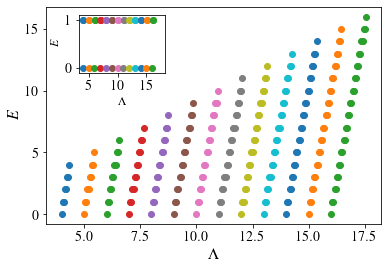

In [149]:
x, y = plot_data(HOhamEigs)
fig, ax1 = plt.subplots()

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.2, 0.65, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

for ax in [ax1,ax2]:
    for i in range(len(HOhamEigs)):
        ax.scatter(x[i],y[i])

ax2.set_ylim([-0.1,1.1])
ax2.set_xlabel('$\\Lambda$',fontsize=12)
ax2.set_ylabel('$E$',fontsize=12)


ax1.set_xlabel('$\\Lambda$')
ax1.set_ylabel('$E$')

fig.savefig('PLOTS/HO_spectra.pdf',bbox_inches='tight')

In [135]:
#eigs[0]

In [136]:
#AHOcutsg0 = [n for n in range(2**2,2**5+1)]
#AHOeigsg0 = []

#h_b_AHO = 0.5*(p*p) + 0.5*(m*q+g*q**3)**2
#h_f_AHO = -0.5*(m+3*g*q*q)#[bdag,b]

#for n in cuts:
#    ham = Hamiltonian(h_b_AHO, h_f_AHO, {m:1, g:0},
#                  n, standard_encode)

#    eigSys = np.linalg.eig(getMatrix(ham.pauliStrings))
#    eigVals = [en.real for en in eigSys[0]]
#    AHOeigsg0.append(np.sort(eigVals))

In [137]:
#x,y=plot_data(AHOeigsg0)

#for i in range(len(AHOeigsg0)):
#    plt.scatter(x[i],y[i])
#plt.plot([x-2 for x in range(2**5)],[0 for y in range(2**5)])
#plt.xlabel('$\\Lambda$')
#plt.ylabel('$E$')
#plt.xlim(3,17)
#plt.ylim(-5,10)
#plt.title('AHO with $g=0$')
#plt.show()
#plt.savefig('PLOTS/.pdf')

In [138]:
AHOcuts = [n for n in range(2**2,2**6+1)]
AHOqubitEigs = []
AHOhamEigs = []

for n in AHOcuts:
    ham = Hamiltonian(h_b_AHO, h_f_AHO, {m:1, g:1},
                  n, standard_encode)

    eigSys = np.linalg.eig(getMatrix(ham.pauliStrings))
    eigVals = [en.real for en in eigSys[0]]
    AHOqubitEigs.append(np.sort(eigVals))
    eigSys = np.linalg.eig(np.array(ham.hamMatrix,dtype=float))
    eigVals = [en.real for en in eigSys[0]]
    AHOhamEigs.append(np.sort(eigVals))

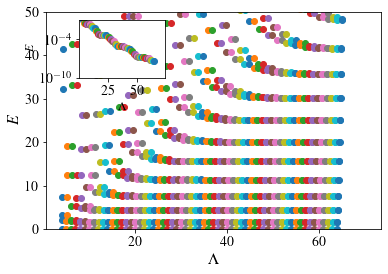

In [150]:
x,y=plot_data(AHOhamEigs)
fig, ax1 = plt.subplots()

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.2, 0.65, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

for ax in [ax1,ax2]:
    for i in range(len(AHOhamEigs)):
        ax.scatter(x[i],y[i])

ax2.set_ylim([1e-10,1e-1])
ax2.set_xlabel('$\\Lambda$',fontsize=12)
ax2.set_ylabel('$E$',fontsize=12)
ax2.set_yscale('log')

ax1.set_ylim([0,50])
ax1.set_xlabel('$\\Lambda$')
ax1.set_ylabel('$E$')

fig.savefig('PLOTS/AHO_spectra.pdf',bbox_inches='tight')

# Double well spectrum

In [141]:
h_b_DW = 0.5*(p*p + (m*q + g*(q*q + mu*mu))**2)
h_f_DW = -0.5*(m+2*g*q)#[bdag,b]

DWcuts = [n for n in range(2**2,2**4+1)]
DWqubitEigs = []
DWhamEigs = []

for n in DWcuts:
    ham = Hamiltonian(h_b_DW, h_f_DW, {m:1, g:1, mu:1},
                  n, standard_encode)

    eigSys = np.linalg.eig(getMatrix(ham.pauliStrings))
    eigVals = [en.real for en in eigSys[0]]
    DWqubitEigs.append(np.sort(eigVals))
    eigSys = np.linalg.eig(np.array(ham.hamMatrix,dtype=float))
    eigVals = [en.real for en in eigSys[0]]
    DWhamEigs.append(np.sort(eigVals))

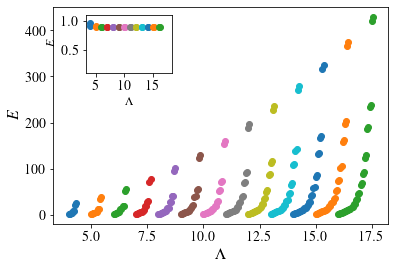

In [151]:
x,y=plot_data(DWhamEigs)
fig, ax1 = plt.subplots()

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.2, 0.65, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

for ax in [ax1,ax2]:
    for i in range(len(DWhamEigs)):
        ax.scatter(x[i],y[i])

ax2.set_ylim([1e-1,1.1])
ax2.set_xlabel('$\\Lambda$',fontsize=12)
ax2.set_ylabel('$E$',fontsize=12)


ax1.set_xlabel('$\\Lambda$')
ax1.set_ylabel('$E$')

fig.savefig('PLOTS/DW_spectra.pdf',bbox_inches='tight')